In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.integrate import solve_ivp
from utils import *

In [2]:
# loading data
data_x0 = np.loadtxt('data/nonlinear_vectorfield_data_x0.txt')
data_x1 = np.loadtxt('data/nonlinear_vectorfield_data_x1.txt')

### Task 3.1

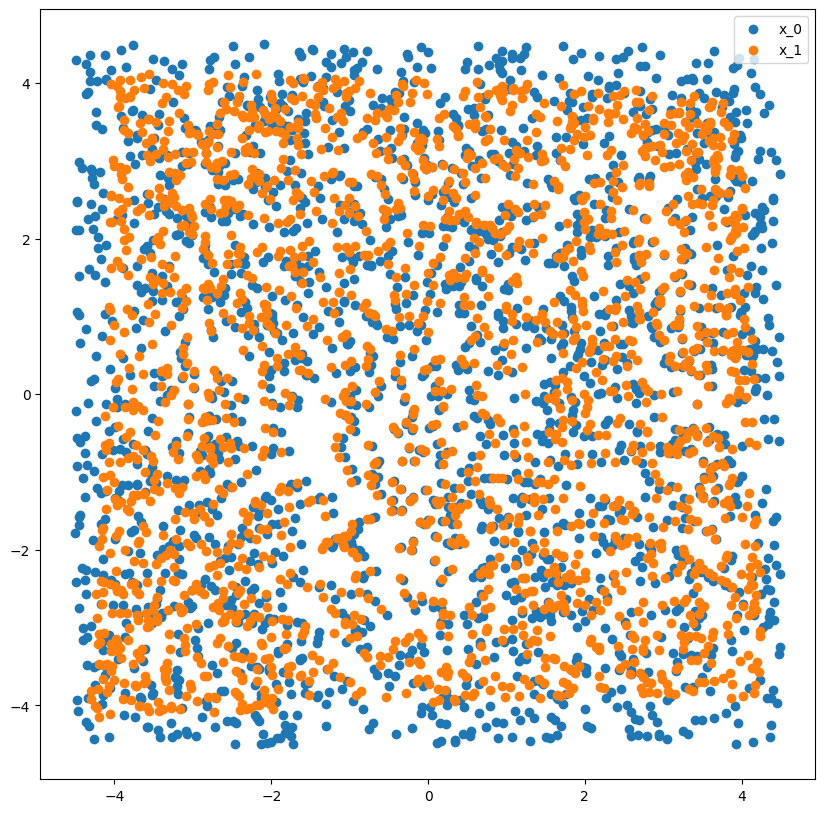

In [3]:
#plotting data
fig = plt.figure(figsize=(10,10))
plt.scatter(data_x0[:,0], data_x0[:,1], label="x_0")
plt.scatter(data_x1[:,0], data_x1[:,1], label="x_1")
plt.legend()
plt.show()

In [4]:
delta_t = 0.01
v_hat = estimate_vector(data_x0, data_x1,delta_t)

In [5]:
#Approximated A matrix
A_approximated = lstsq(data_x0, v_hat, cond=None)[0]

In [6]:
# Define linear approximation function
def linear_approximation(A, x0, delta_t):
    return x0 + delta_t * np.dot(A, x0.T)

In [7]:
predicted_x1_all = np.array([linear_approximation(A_approximated, x0, delta_t) for x0 in data_x0])
mse_all = np.mean(np.square(data_x1 - predicted_x1_all))
print(f'Mean Squared Error: {mse_all}')

Mean Squared Error: 0.0186434856287006


In [8]:
# Tend = 0.01
# x1_hat = generate(data_x0,Tend,A_approximated)

In [9]:
# mse = np.linalg.norm(x1_hat-data_x1) ** 2 / len(data_x1)
# print(mse)

### Task 3.2

In [10]:
l = 800  # Number of centers
eps = 2  # Width of RBFs

In [11]:
phi = radial_basis_function(data_x0, l, eps)

# Perform linear regression to estimate coefficients
coefficients = lstsq(phi, v_hat, cond=None)[0]

# Approximate the vector field using RBF
def rbf_approximation(coefficients):
    return np.dot(phi, coefficients)

In [12]:
# Evaluate RBF approximation for all data points
rbf_approximated_v = np.array(rbf_approximation(coefficients))

In [13]:
# Calculate Mean Squared Error
mse_rbf = np.mean(np.square(v_hat - rbf_approximated_v))
print(f'Mean Squared Error (RBF): {mse_rbf}')

Mean Squared Error (RBF): 4.031005769422879e-12


### Task 3.3

In [14]:
t_final = 10  # Adjust as needed
delta_t = 0.01
num_steps = int((t_final) / delta_t) + 1

In [15]:
def simulate_system(vector_field, initial_points, t_final, delta_t, coefficients, phi):
    t_span = (0, t_final)
    t_eval = np.linspace(0, t_final, int((t_final) / delta_t) + 1)
    solution = np.zeros((len(initial_points), 2, len(t_eval)))

    for i, initial_point in enumerate(initial_points):
        sol = solve_ivp(vector_field, y0=initial_point, t_span=t_span, args=(coefficients, phi), t_eval=t_eval)
        solution[i, :, :] = sol.y 

    return solution

# def simulate_system(vector_field, initial_points, t_final, delta_t, coefficients, phi):
#     t_span = (0, t_final)
#     t_eval = np.linspace(0, t_final, int((t_final) / delta_t) + 1)
#     solution = np.zeros((len(initial_points) // 2, 2, len(t_eval)))

#     for i in range(0, len(initial_points), 2):
#         initial_point = initial_points[i:i+2]
#         sol = solve_ivp(vector_field, y0=initial_point, t_span=t_span, args=(coefficients, phi), t_eval=t_eval)
#         solution[i//2, :, :] = sol.y 

#     return solution

def rbf_approximation_sim(t, y, coefficients, phi):
    # Assuming y is not used, modify as needed
    return phi @ coefficients

In [16]:
initial_points = data_x0

# Simulate the system using the RBF model
solution_rbf = simulate_system(rbf_approximation_sim, initial_points, t_final, delta_t, coefficients, phi)

ValueError: could not broadcast input array from shape (2000,2) into shape (2,)

In [ ]:
# C_rbf = coefficients

# def evolve_system(initial_point, vector_field, time_steps, dt=0.01):
#     # Initialize the solution with the initial point
#     solution = np.zeros((time_steps + 1, len(initial_point)))
#     solution[0, :] = initial_point

#     # Evolve the system using the vector field
#     for t in range(1, time_steps + 1):
#         solution[t, :] = solution[t - 1, :] + dt * vector_field(solution[t - 1, :])

#     return solution

# # Set the larger time for system evolution
# larger_time_steps = 1000

# # Choose an initial point (you can loop over all initial points if needed)
# initial_point = data_x0[0] # select an initial point from x0

# # If using linear approximation from Task 1:
# # solution_linear = evolve_system(initial_point, lambda x: A_linear @ x, larger_time_steps)

# # If using RBF approximation from Task 2:
# solution_rbf = evolve_system(initial_point, lambda x: rbf_approximation(C_rbf), larger_time_steps)

# # plt.plot(solution_linear[:, 0], solution_linear[:, 1], label='Linear Approximation')
# plt.plot(solution_rbf[:, 0], solution_rbf[:, 1], label='RBF Approximation')
# plt.scatter(initial_point[0], initial_point[1], color='red', marker='o', label='Initial Point')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()